### Basic LSTM RNN Model

In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(0, 799, 800)

In [3]:
y = torch.sin(x * 2 * 3.1416 / 40)

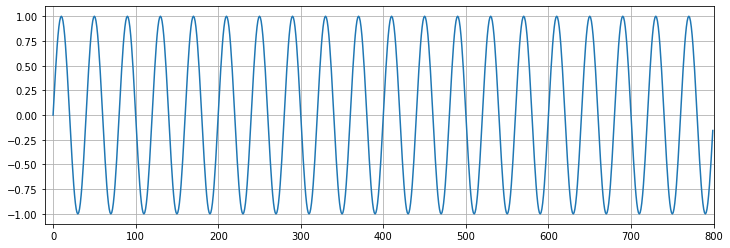

In [5]:
plt.figure(figsize = (12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [4]:
test_size = 40
train = y[: - test_size]
test = y[- test_size :]

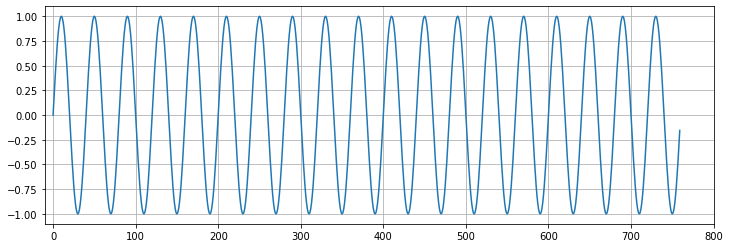

In [7]:
plt.figure(figsize = (12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train.numpy())

In [7]:
# takes a sequence and the sequence size
def prep_data(seq, ss):
    output = [] # ([0,1,2,3],[4]) , ([1,2,3,4],[5]) ....
    l = len(seq)
    
    for i in range(l - ss):
        data = seq[i : i + ss]
        label = seq[i + ss : i + ss + 1]
        output.append((data, label))
        
    return output

In [8]:
# hyperparameter
seq_size = 40

In [9]:
train_data = prep_data(train, seq_size)
len(train_data)

720

In [11]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [10]:
# The LSTM class
class LSTM(nn.Module):
    def __init__(self, input_dim = 1, hidden_dim = 50, output_dim = 1):
        
        super().__init__()
        self.hidden_dim = hidden_dim
        
        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.fc1 = nn.Linear(hidden_dim, output_dim)
        
        self.hidden = (torch.zeros(1,1,hidden_dim), torch.zeros(1,1,hidden_dim))
    
    def forward(self, seq):
        
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.fc1(lstm_out.view(len(seq), -1))
        
        return pred[-1]
    

In [11]:
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [14]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (fc1): Linear(in_features=50, out_features=1, bias=True)
)

In [15]:
# more hyperparameters
epochs = 10
future = 40

In [16]:
train[- seq_size: ].tolist()

[0.0002596856211312115,
 0.15669289231300354,
 0.30926769971847534,
 0.45422035455703735,
 0.5879955291748047,
 0.7072919607162476,
 0.8091720938682556,
 0.8911271691322327,
 0.9511368870735168,
 0.9877293109893799,
 1.0,
 0.9876466989517212,
 0.950973629951477,
 0.8908873796463013,
 0.8088615536689758,
 0.7069184184074402,
 0.5875681638717651,
 0.4537496268749237,
 0.3087652921676636,
 0.15617111325263977,
 -0.0002685945073608309,
 -0.1567016988992691,
 -0.30927619338035583,
 -0.4542282819747925,
 -0.5880027413368225,
 -0.7072982788085938,
 -0.8091772794723511,
 -0.8911312222480774,
 -0.9511396288871765,
 -0.9877306818962097,
 -0.9999999403953552,
 -0.9876452684402466,
 -0.9509708881378174,
 -0.8908833265304565,
 -0.8088563084602356,
 -0.706912100315094,
 -0.5875609517097473,
 -0.4537416994571686,
 -0.3087567985057831,
 -0.1561623215675354]

Epoch:  1 | Loss: 0.08569194
Test Loss: 0.6094725131988525


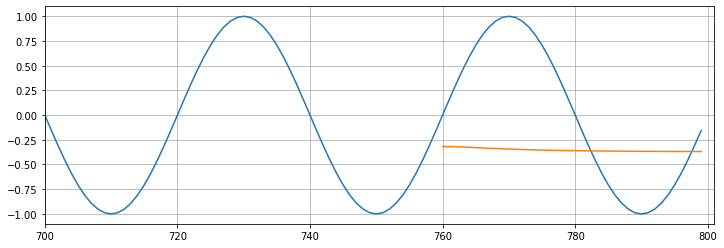

Epoch:  2 | Loss: 0.04774228
Test Loss: 0.528975784778595


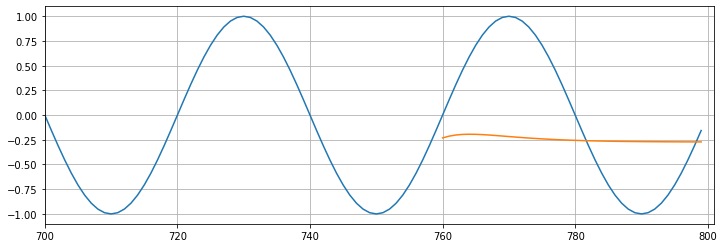

Epoch:  3 | Loss: 0.01380421
Test Loss: 0.3641579747200012


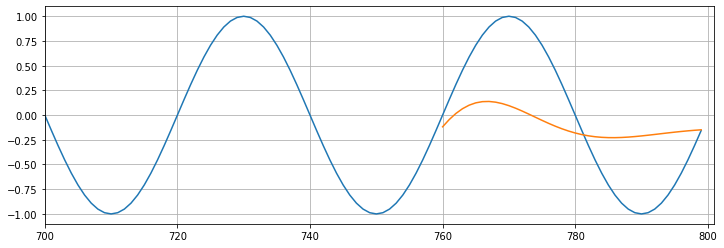

Epoch:  4 | Loss: 0.00120878
Test Loss: 0.06570444256067276


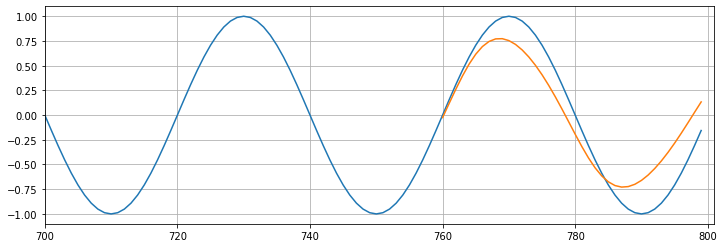

Epoch:  5 | Loss: 0.00020293
Test Loss: 0.004316256381571293


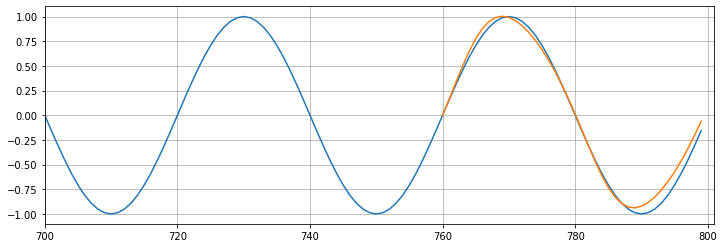

Epoch:  6 | Loss: 0.00012309
Test Loss: 0.0026884819380939007


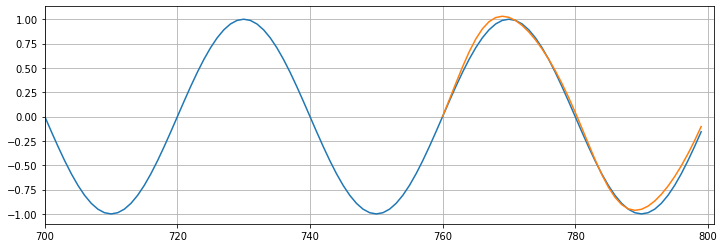

Epoch:  7 | Loss: 0.00010278
Test Loss: 0.0025773276574909687


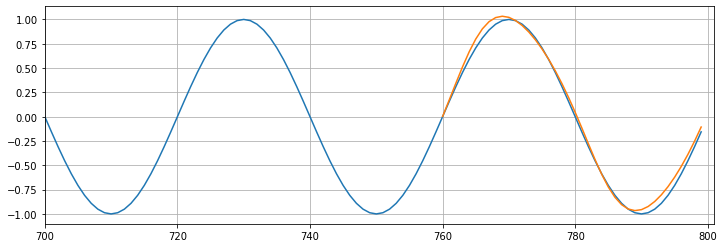

Epoch:  8 | Loss: 0.00009028
Test Loss: 0.0025319044943898916


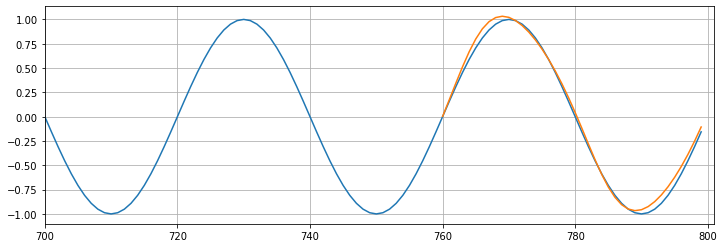

Epoch:  9 | Loss: 0.00008054
Test Loss: 0.0024970080703496933


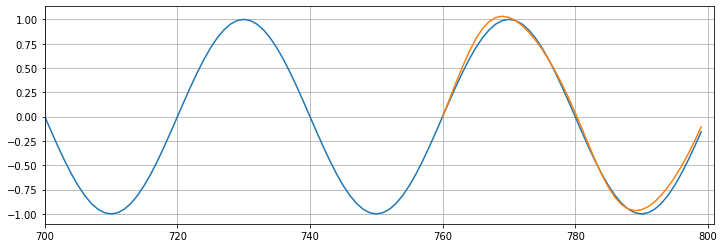

Epoch: 10 | Loss: 0.00007264
Test Loss: 0.002465613419190049


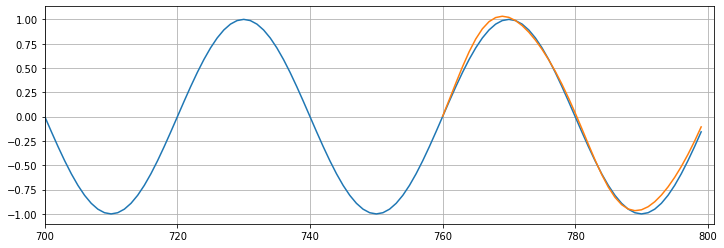

In [17]:
for i in range(epochs):
    
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_dim),torch.zeros(1,1,model.hidden_dim))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # training result
    print(f'Epoch: {i+1:2} | Loss: {loss.item():10.8f}')
    
    # test loss against predicitons
    preds = train[-seq_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-seq_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_dim),torch.zeros(1,1,model.hidden_dim))
            
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-seq_size:]),y[760:])
    print(f'Test Loss: {loss}')

    # Plot
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[seq_size:])
    plt.show()

### Real Predictions

In [12]:
# hyperparams
epochs = 15
seq_size = 40
future = 40

In [13]:
all_data = prep_data(y, seq_size)

In [14]:
# retraininghttps://www.hidive.com/

import time 
start_time = time.time()

# copied from above
for i in range(epochs):
    
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_dim),torch.zeros(1,1,model.hidden_dim))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # training result
    print(f'Epoch: {i+1:2} | Loss: {loss.item():10.8f}')

total_time = time.time() - start_time
print(total_time / 60)

Epoch:  1 | Loss: 0.08087332
Epoch:  2 | Loss: 0.05749079
Epoch:  3 | Loss: 0.03504918
Epoch:  4 | Loss: 0.01232158
Epoch:  5 | Loss: 0.00143555
Epoch:  6 | Loss: 0.00014236
Epoch:  7 | Loss: 0.00005850
Epoch:  8 | Loss: 0.00005231
Epoch:  9 | Loss: 0.00005322
Epoch: 10 | Loss: 0.00005420
Epoch: 11 | Loss: 0.00005451
Epoch: 12 | Loss: 0.00005420
Epoch: 13 | Loss: 0.00005340
Epoch: 14 | Loss: 0.00005224
Epoch: 15 | Loss: 0.00005084
1.5177567760149637


In [19]:
# forecast
preds = y[-seq_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-seq_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_dim),torch.zeros(1,1,model.hidden_dim))  
        preds.append(model(seq).item())      

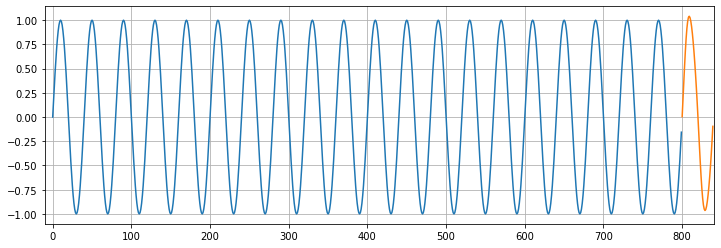

In [20]:
# plot predicitons
plt.figure(figsize=(12, 4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800, 800 + future),preds[seq_size:])
plt.show()